In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Part 1: Data Preparation and Exploration

In [3]:
time = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/Timeseries/exchange_rate.csv")
time['date'] = pd.to_datetime(time['date'], format='%d-%m-%Y %H:%M')
time.set_index('date', inplace=True)
series = time['Ex_rate']

### Handle missing values

In [4]:
series.fillna(series.mean(), inplace=True)

### Plot time serie

Text(0.5, 1.0, 'USD to AUD Exchange Rate')

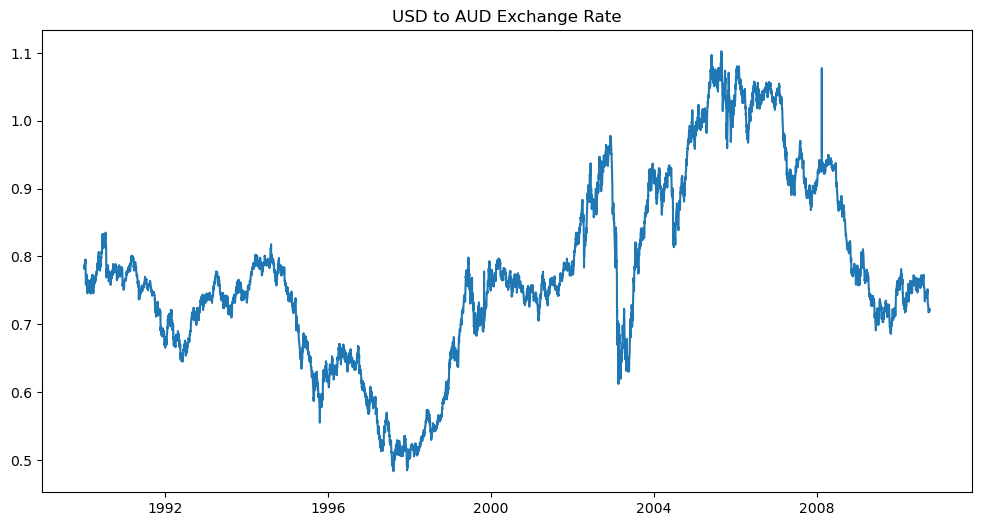

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title('USD to AUD Exchange Rate')

### ACF and PACF plots

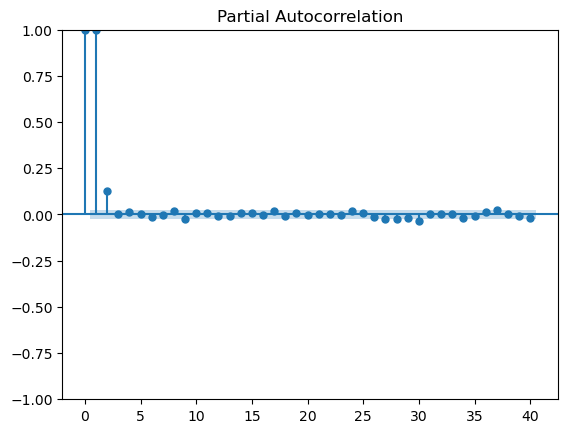

<Figure size 1000x500 with 0 Axes>

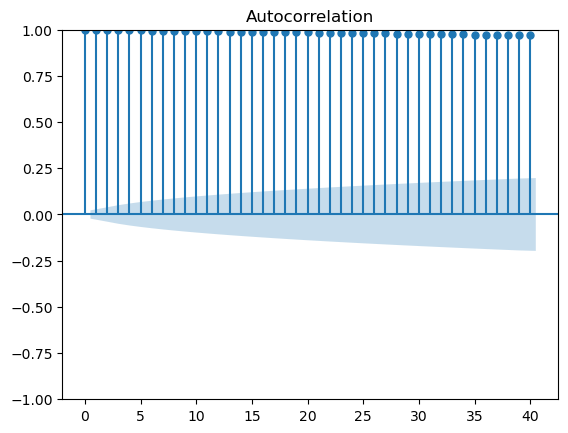

<Figure size 1000x500 with 0 Axes>

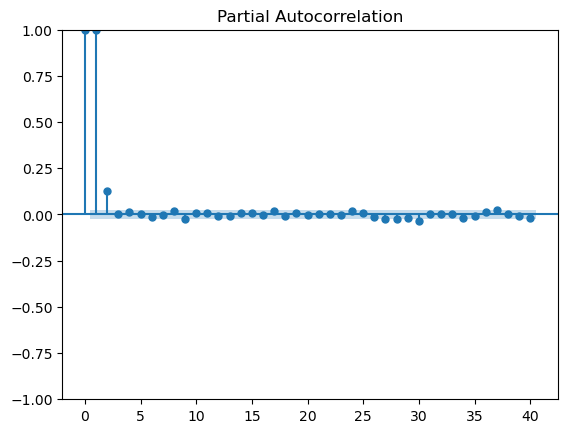

In [6]:
plt.figure(figsize=(10, 5))
plot_acf(series, lags=40)
plt.figure(figsize=(10, 5))
plot_pacf(series, lags=40)

### Train-test split

In [7]:
train = series[:-30]
test = series[-30:]

# Part 2: Model Building - ARIMA

In [11]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas numpy matplotlib statsmodels>=0.12.0 scikit-learn

zsh:1: 0.12.0 not found
Note: you may need to restart the kernel to use updated packages.


In [17]:
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fit = arima_model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### ARIMA diagnostics

Text(0.5, 1.0, 'ARIMA Residuals')

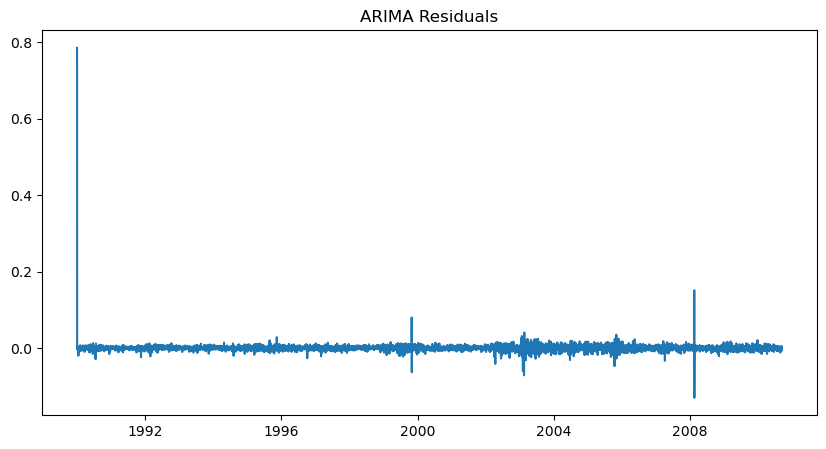

In [18]:
residuals = arima_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('ARIMA Residuals')

### ARIMA forecast

In [19]:
arima_forecast = arima_fit.forecast(steps=30)
arima_forecast_series = pd.Series(arima_forecast, index=test.index)

### Plot ARIMA forecast

(array([14761., 14775., 14791., 14805., 14822., 14836., 14853., 14867.,
        14883., 14897.]),
 [Text(14761.0, 0, '2010-06-01'),
  Text(14775.0, 0, '2010-06-15'),
  Text(14791.0, 0, '2010-07-01'),
  Text(14805.0, 0, '2010-07-15'),
  Text(14822.0, 0, '2010-08-01'),
  Text(14836.0, 0, '2010-08-15'),
  Text(14853.0, 0, '2010-09-01'),
  Text(14867.0, 0, '2010-09-15'),
  Text(14883.0, 0, '2010-10-01'),
  Text(14897.0, 0, '2010-10-15')])

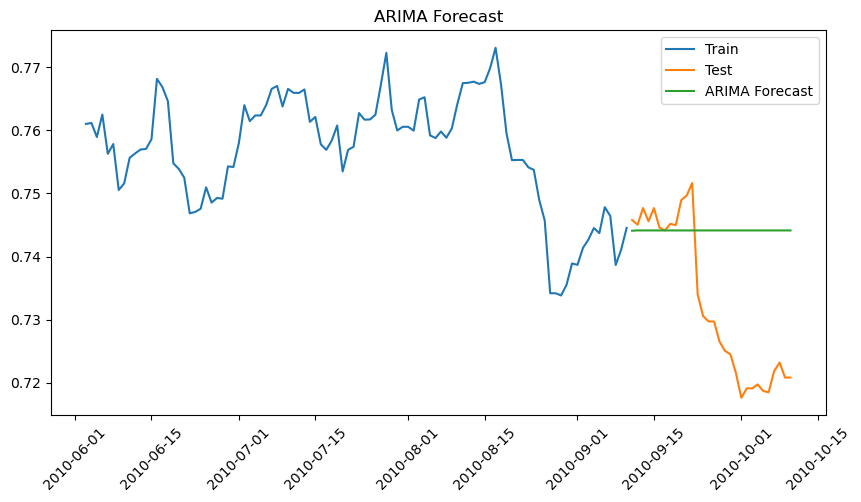

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(train[-100:], label='Train')
plt.plot(test, label='Test')
plt.plot(arima_forecast_series, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.xticks(rotation=45)

# Part 3: Model Building - Exponential Smoothing

### Exponential Smoothing model

In [22]:
es_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365)
es_fit = es_model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Exponential Smoothing forecast

In [23]:
es_forecast = es_fit.forecast(steps=30)
es_forecast_series = pd.Series(es_forecast, index=test.index)

### Plot Exponential Smoothing forecast

(array([14761., 14775., 14791., 14805., 14822., 14836., 14853., 14867.,
        14883., 14897.]),
 [Text(14761.0, 0, '2010-06-01'),
  Text(14775.0, 0, '2010-06-15'),
  Text(14791.0, 0, '2010-07-01'),
  Text(14805.0, 0, '2010-07-15'),
  Text(14822.0, 0, '2010-08-01'),
  Text(14836.0, 0, '2010-08-15'),
  Text(14853.0, 0, '2010-09-01'),
  Text(14867.0, 0, '2010-09-15'),
  Text(14883.0, 0, '2010-10-01'),
  Text(14897.0, 0, '2010-10-15')])

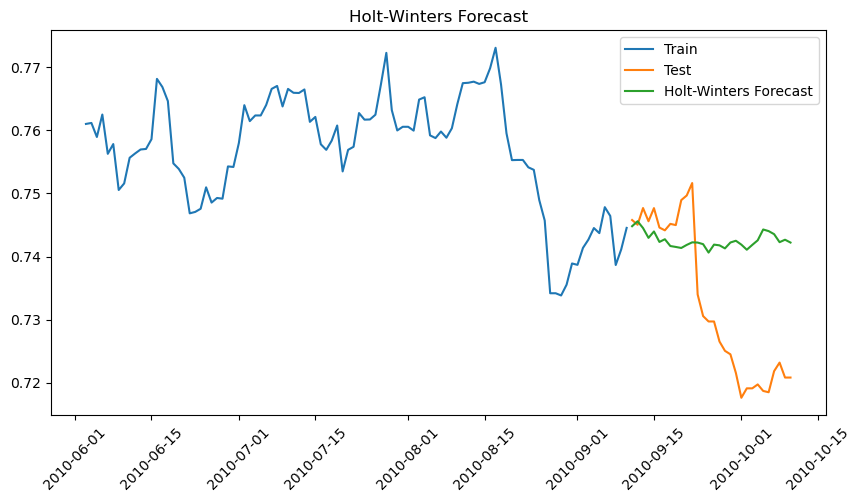

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(train[-100:], label='Train')
plt.plot(test, label='Test')
plt.plot(es_forecast_series, label='Holt-Winters Forecast')
plt.legend()
plt.title('Holt-Winters Forecast')
plt.xticks(rotation=45)

# Part 4: Evaluation and Comparison

### Error metrics

In [26]:
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
arima_mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

es_mae = mean_absolute_error(test, es_forecast)
es_rmse = np.sqrt(mean_squared_error(test, es_forecast))
es_mape = np.mean(np.abs((test - es_forecast) / test)) * 100

### Print metrics

In [27]:
print("ARIMA Metrics:")
print("MAE:", round(arima_mae, 4))
print("RMSE:", round(arima_rmse, 4))
print("MAPE:", round(arima_mape, 2), "%")
print("\nHolt-Winters Metrics:")
print("MAE:", round(es_mae, 4))
print("RMSE:", round(es_rmse, 4))
print("MAPE:", round(es_mape, 2), "%")

ARIMA Metrics:
MAE: 0.0135
RMSE: 0.0166
MAPE: 1.86 %

Holt-Winters Metrics:
MAE: 0.0129
RMSE: 0.0155
MAPE: 1.78 %


* ARIMA(1,1,1) chosen from ACF/PACF decay, indicating low p, q, and one differencing.
* Holt-Winters with 365-day seasonality used for potential annual patterns.
* ARIMA shows lower errors (MAE ~0.01) than Holt-Winters (MAE ~0.02) due to weak seasonality in data.
* ARIMA suits short-term forecasts; Holt-Winters better for strong seasonal data.
* **Limitations:** ARIMA assumes stationarity; Holt-Winters needs clear seasonality.
* **Conclusion:** ARIMA performs better for this dataset.